## The Battle of Neighborhoods

Where to move as an amputee person in the city of toronto?


In [1]:
import numpy as np
import pandas as pd
import requests

### 1. Walkability
The data for **Wellbeing Toronto - Civics & Equity Indicators** was obtained from https://open.toronto.ca/.

In [2]:
#Using the code provided for the developers
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "c7b66c2c-1980-4edc-8a06-56e320e02803"}
package = requests.get(url, params = params).json()

# load the xslx file to a dataframe
url = package["result"]["resources"][0]["url"]
Toronto_walk = pd.read_excel(url,
                   sheet_name='RawData-Ref Period 2011',
                   skiprows=range(1),
                   skipfooter=0)
Toronto_df= Toronto_walk[['Neighbourhood Id', 'Neighbourhood', 'Walk Score']]
Toronto_df.head()


,Neighbourhood Id,Neighbourhood,Walk Score
0,1,West Humber-Clairville,57
1,2,Mount Olive-Silverstone-Jamestown,61
2,3,Thistletown-Beaumond Heights,54
3,4,Rexdale-Kipling,58
4,5,Elms-Old Rexdale,48


### 2. Coordinates

Using geocoder, the location of each neighbourhood was added to the table

In [3]:
! pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_request")

Latitudes = np.zeros(len(Toronto_df))
Longitudes = np.zeros(len(Toronto_df))

Toronto_Loc = {}
Toronto_Loc['Neighbourhood Id'] = Toronto_df['Neighbourhood Id']
Toronto_Loc['Latitude'] = Latitudes
Toronto_Loc['Longitude'] = Longitudes

Toronto_Loc_df = pd.DataFrame(Toronto_Loc)
#temp = Toronto_df.tail(10).reset_index(drop=True)

for i in range(len(Toronto_df['Neighbourhood'])):  
    hoods = Toronto_df.loc[i,'Neighbourhood'].split('-')  # First the data will be split
    lat = []
    lng = []
    for hood in hoods: # for each area in the neighbourhood the coordiantes will be obtained
        locat = '{}, Toronto'.format(hood)
        location = geolocator.geocode(locat)
        if((location!= None) and (42<location.latitude<44) and (-80<location.longitude<-78)): # check if the coordiantes are rughly correct
            lat.append(location.latitude)
            lng.append(location.longitude)
    
    if lat: # check if lat is not empty
       Toronto_Loc_df.loc[i, 'Latitude'] = np.asarray(lat).mean()
       Toronto_Loc_df.loc[i, 'Longitude']= np.asarray(lng).mean()

To get a better sense of the data, the dataframe was sorted by the lattidue values. Doing so, it was observed that the latidue and longitude values of 4 neighbourhoods were missing. Therefore, the values for the 4 neighbourhoods [Humbermede (22), Woodbine Corridor (64), Lambton Baby Point (114), Wexford/Maryvale (119)] were obtained manually from google

In [4]:
Toronto_Loc_df.sort_values('Latitude')

Toronto_Loc_df.loc[21, ['Latitude', 'Longitude']] = [43.7390, -79.5394]
Toronto_Loc_df.loc[63, ['Latitude', 'Longitude']] = [43.6922, -79.3099]
Toronto_Loc_df.loc[113, ['Latitude', 'Longitude']] = [43.6560, -79.4943]
Toronto_Loc_df.loc[118, ['Latitude', 'Longitude']] = [43.7613, -79.3008]

Toronto_Loc_df.sort_values('Latitude')

,Neighbourhood Id,Latitude,Longitude
18,19,43.592005,-79.545365
17,18,43.600763,-79.505264
19,20,43.601717,-79.545232
16,17,43.616677,-79.496805
15,16,43.630609,-79.499878
...,...,...,...
128,129,43.808038,-79.266439
131,132,43.809196,-79.221701
48,49,43.809421,-79.353391
115,116,43.816178,-79.314538


### 3. Safety

The data for **Toronto pedestrian: Killed or Seriously Injured (KSI) from a road accident** was obtained from https://data.torontopolice.on.ca/datasets/pedestrians/data

In [5]:
url = 'https://opendata.arcgis.com/datasets/1e8a71c533fb4b0aa522cf1b1236bee7_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D'
Toronto_Pedestrian = pd.read_csv(url)
Toronto_Pedestrian.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8.839464e+06,5.411883e+06,3366651,884090,2006,2006/01/02 05:00:00+00,705,7,BATHURST ST,DUNDAS ST W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,Kensington-Chinatown (78),1
1,-8.839464e+06,5.411883e+06,3366652,884090,2006,2006/01/02 05:00:00+00,705,7,BATHURST ST,DUNDAS ST W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,Kensington-Chinatown (78),2
2,-8.842507e+06,5.412229e+06,3370333,885782,2006,2006/01/04 05:00:00+00,1940,19,DUFFERIN ST,SYLVAN AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Dufferin Grove (83),3
3,-8.842507e+06,5.412229e+06,3370334,885782,2006,2006/01/04 05:00:00+00,1940,19,DUFFERIN ST,SYLVAN AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Dufferin Grove (83),4
4,-8.832963e+06,5.431006e+06,3363337,882079,2006,2006/01/06 05:00:00+00,2210,22,DON MILLS RD,LEITH HILL RD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,Don Valley Village (47),5


The pedestrian safety index was defined based on injury frequency. Weights of [1, 2, 3, 4, 5] were assigned to injury groups of [None, Minimal, Minor, Major, Fatal]. The satey index was then calculated as the weighted sum of the frequency of the injury occurances.

It was also observed that there were no recorded pedestrian accident for the Neigbourhood with id of 114. Therefore a safety index of 0 was assigned to this neighbourhood

In [6]:
Toronto_PedestrianSafty= Toronto_Pedestrian[['Hood_ID', 'INJURY']].copy() 
Toronto_PedestrianSafty.groupby(['Hood_ID', 'INJURY'])['INJURY'].count().to_frame('COUNT').reset_index()

,Hood_ID,INJURY,COUNT
0,1,Fatal,13
1,1,Major,44
2,1,Minimal,2
3,1,None,66
4,2,Fatal,2
...,...,...,...
529,139,None,10
530,140,Fatal,1
531,140,Major,2
532,140,Minimal,1


In [7]:
# replace injury with numerical weights and define the hazard index
Toronto_PedestrianSafty= Toronto_Pedestrian[['Hood_ID', 'INJURY']].copy() 
Toronto_PedestrianSafty.replace(['None', 'Minimal', 'Minor', 'Major', 'Fatal'], [0, 1, 2, 3, 4], inplace = True)
Toronto_Pedestrian_Grouped = Toronto_PedestrianSafty.groupby(['Hood_ID', 'INJURY'])['INJURY'].count().to_frame('Hazard').reset_index()
Toronto_Pedestrian_Grouped['Hazard']= Toronto_Pedestrian_Grouped['Hazard']*Toronto_Pedestrian_Grouped['INJURY']

# add the neigbourhood with hood_id of 114 
Toronto_Pedestrian_Grouped2= Toronto_Pedestrian_Grouped.groupby(['Hood_ID'])['Hazard'].mean().to_frame('Hazard Index').reset_index()
Toronto_Pedestrian_Grouped2= Toronto_Pedestrian_Grouped2.append({'Hood_ID': 114, 'Hazard Index':0}, ignore_index=True)
Toronto_Pedestrian_Grouped2= Toronto_Pedestrian_Grouped2.sort_values('Hood_ID').reset_index(drop=True)

Toronto_Pedestrian_Grouped2['Hazard Index'] = Toronto_Pedestrian_Grouped2['Hazard Index'].round(0).astype(int)
Toronto_Pedestrian_Grouped2

,Hood_ID,Hazard Index
0,1,46
1,2,17
2,3,10
3,4,8
4,5,5
...,...,...
135,136,19
136,137,37
137,138,22
138,139,7


### 4. Merge:
All the dataframes were merged together

In [8]:
Toronto_df = Toronto_df.join(Toronto_Pedestrian_Grouped2.set_index('Hood_ID'), on='Neighbourhood Id')
Toronto_df = Toronto_df.join(Toronto_Loc_df.set_index('Neighbourhood Id'), on='Neighbourhood Id')

Toronto_df

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude
0,1,West Humber-Clairville,57,46,43.678524,-79.629129
1,2,Mount Olive-Silverstone-Jamestown,61,17,43.742049,-79.591955
2,3,Thistletown-Beaumond Heights,54,10,43.737266,-79.565317
3,4,Rexdale-Kipling,58,8,43.679477,-79.550504
4,5,Elms-Old Rexdale,48,5,43.709180,-79.543698
...,...,...,...,...,...,...
135,136,West Hill,66,19,43.768914,-79.187291
136,137,Woburn,66,37,43.759824,-79.225291
137,138,Eglinton East,62,22,43.739465,-79.232100
138,139,Scarborough Village,70,7,43.743742,-79.211632


### 5. Foursquare
Using the Foursquare API to explore the neighborhoods in Toronto. Given that the goal of this project is to find the best neighbourhoods for peopel with leg amputation to live, the search was focused on criterias like accesibility to **healthcare**, **healthy diet** & **fitness**. 

In [9]:
# @hidden_cell
#shakiba.rafiee@gmail.com
CLIENT_ID = 'RYKR4MC4MELEBLYWPCDVBI5LDEO4VL1MTGUHP3HPJ1MMMLIQ' # your Foursquare ID
CLIENT_SECRET = 'VYUM1W30DA1GVMAFAMDRU4UHVQUABS5EUCAIYOTG201ATOPY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [22]:
# @hidden_cell
#shrafiee@umd.edu
CLIENT_ID = 'PZYGS1UAO044OOB1FDRSGCXANJYDSVPMV35RGU25WS4WJEJ0' # your Foursquare ID
CLIENT_SECRET = '2NMFRAUJ5SZ04MQUHXCG4XRNAONFJJGEW51GFVC0FPKGVP0B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [82]:
# @hidden_cell
#alavirad@umd.edu
CLIENT_ID = 'OPTRCGQ14ZTDZKWGCJQOQMAOPAJXDFUGZDE20HHKNDNGKPIQ' # your Foursquare ID
CLIENT_SECRET = 'QC2VZT4JXJQYACRRTNSH2JOSYTQVS112K0HY4H4MDSDOSXOZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [10]:
def getNearbyVenues_specified(Venue, Neighbourhoods, latitudes, longitudes, radius=500):
    venues_list=[]
    for hood, lat, lng in zip(Neighbourhoods, latitudes, longitudes):
        
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            Venue,
            radius, 
            LIMIT)
        
        # GET request
        venues = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each venue
        for v in venues:
            if (v['name'] and v['location']['lat'] and v['location']['lng'] and v['categories']):
                venues_list.append([(hood, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name'])])

        if len(venues)>0:
            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood', 
                                     'Neighborhood Latitude', 
                                     'Neighborhood Longitude', 
                                     'Venue', 
                                     'Venue Latitude', 
                                     'Venue Longitude', 
                                     'Venue Category']
    return(nearby_venues)

#### 5.1 Healthcare Venues
The key words *healthcare*, *rehab*, *medical* and *Physical Therapist* were used to find accesibility to healthy food venues

In [11]:
# Find Health care venues using key words "healthcare", "rehab", "medical" and "Physical Therapist"
Toronto_Healthcare_venues= getNearbyVenues_specified(Venue = 'healthcare',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_Rehab_venues= getNearbyVenues_specified(Venue = 'rehab',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_Medical_venues= getNearbyVenues_specified(Venue = 'medical',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_PT_venues= getNearbyVenues_specified(Venue = 'Physical Therapist',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])

In [12]:
Toronto_Health_venues = Toronto_Healthcare_venues
Toronto_Health_venues = Toronto_Health_venues.append(Toronto_Rehab_venues, ignore_index=True)
Toronto_Health_venues = Toronto_Health_venues.append(Toronto_Medical_venues, ignore_index=True)
Toronto_Health_venues = Toronto_Health_venues.append(Toronto_PT_venues, ignore_index=True)
Toronto_Health_venues = Toronto_Health_venues.drop_duplicates()
Toronto_Health_venues = Toronto_Health_venues.sort_values('Neighborhood').reset_index(drop=True)

#with pd.option_context("display.max_rows", 1000):
    #display(Toronto_Health_venues)

After reviewing the categories of the health venues, the categories 'College Administrative Building', "Dentist's Office", 'Financial or Legal Service', 'Nail Salon', 'Pet Service', 'Sporting Goods Shop'were removed.

In [13]:
Toronto_Health_onehot = pd.get_dummies(Toronto_Health_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_Health_onehot['Neighbourhood'] = Toronto_Health_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_Health_onehot.columns[-1]] + list(Toronto_Health_onehot.columns[:-1])
Toronto_Health_onehot = Toronto_Health_onehot[fixed_columns]

list(Toronto_Health_onehot.columns)

Toronto_Health_onehot = Toronto_Health_onehot.drop(['College Administrative Building', "Dentist's Office", 'Financial or Legal Service', 'Nail Salon', 'Pet Service', 'Sporting Goods Shop'], axis=1)
list(Toronto_Health_onehot.columns)

['Neighbourhood',
 'Acupuncturist',
 'Assisted Living',
 'Building',
 'Chiropractor',
 'College Lab',
 "Doctor's Office",
 'Health & Beauty Service',
 'Home Service',
 'Hospital',
 'Massage Studio',
 'Medical Center',
 'Medical Lab',
 'Medical School',
 'Medical Supply Store',
 'Office',
 'Pharmacy',
 'Physical Therapist',
 'Rehab Center',
 'Shopping Mall',
 'Spa',
 'University',
 'Urgent Care Center']

Group neighborhoods and take the sum occurrence of each *Health care* category

In [14]:
# group rows by neighborhoods 
Toronto_Health_grouped = Toronto_Health_onehot.groupby('Neighbourhood').sum().reset_index()


For this preliminary categorization, weights of 2 were assigned to the 'Physical Therapist','Rehab Center'. Lastly, each neighbourhood's healthcare score was calculated as the sum of avaiable resources

In [15]:
#assinging weight of 2 to 'Physical Therapist','Rehab Center' categories.
Toronto_Health_grouped['Physical Therapist']=Toronto_Health_grouped['Physical Therapist']*2
Toronto_Health_grouped['Rehab Center']=Toronto_Health_grouped['Rehab Center']*2

#calculating the wighted sum
Toronto_Health_grouped['Healthcare Score'] = Toronto_Health_grouped.iloc[0:,1:].sum(axis = 1)


In [16]:
Toronto_HealthCare = Toronto_Health_grouped[['Neighbourhood', 'Healthcare Score']]
with pd.option_context("display.max_rows", 100, "display.max_columns", 100):
    display(Toronto_HealthCare)

,Neighbourhood,Healthcare Score
0,Agincourt South-Malvern West,3
1,Alderwood,1
2,Annex,3
3,Banbury-Don Mills,1
4,Bathurst Manor,9
5,Bay Street Corridor,11
6,Bayview Village,3
7,Bayview Woods-Steeles,2
8,Beechborough-Greenbrook,3
9,Bendale,7


#### 5.2 Fitness Venues


In [17]:
Toronto_Fitness_venues= getNearbyVenues_specified(Venue = 'Fitness',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])

In [18]:
#with pd.option_context("display.max_rows", 1000):
    #display(Toronto_Fitness_venues)

In [19]:
Toronto_Fitness_onehot = pd.get_dummies(Toronto_Fitness_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_Fitness_onehot['Neighbourhood'] = Toronto_Fitness_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_Fitness_onehot.columns[-1]] + list(Toronto_Fitness_onehot.columns[:-1])
Toronto_Fitness_onehot = Toronto_Fitness_onehot[fixed_columns]

list(Toronto_Fitness_onehot.columns)

Toronto_Fitness_onehot = Toronto_Fitness_onehot.drop(['Cafeteria', 'Chiropractor', 'Coffee Shop', "Doctor's Office", 'Juice Bar', 'Pet Service'], axis=1)
list(Toronto_Fitness_onehot.columns)

['Neighbourhood',
 'Athletics & Sports',
 'Boxing Gym',
 'Community College',
 'Dance Studio',
 'Gym',
 'Gym / Fitness Center',
 'High School',
 'Hotel Pool',
 'Martial Arts School',
 'Office',
 'Rehab Center',
 'Yoga Studio']

Group neighborhoods and take the sum occurrence of each *fitness* category. Each neighbourhood's fitness score was calculated as the sum of avaiable resources.

In [20]:
# group rows by neighborhoods 
Toronto_Fitness_grouped = Toronto_Fitness_onehot.groupby('Neighbourhood').sum().reset_index()

#calculating the  sum
Toronto_Fitness_grouped['Fitness Score'] = Toronto_Fitness_grouped.iloc[0:,1:].sum(axis = 1)


In [21]:
Toronto_Fitness = Toronto_Fitness_grouped[['Neighbourhood', 'Fitness Score']]
with pd.option_context("display.max_rows", 100, "display.max_columns", 100):
    display(Toronto_Fitness)

,Neighbourhood,Fitness Score
0,Annex,2
1,Banbury-Don Mills,2
2,Bathurst Manor,5
3,Bay Street Corridor,12
4,Bayview Village,1
5,Birchcliffe-Cliffside,1
6,Blake-Jones,1
7,Briar Hill-Belgravia,1
8,Bridle Path-Sunnybrook-York Mills,1
9,Cabbagetown-South St.James Town,3


#### 5.3 Healthy food Venues
The key words *healthy*, *organic*, *natural* and *vegetarian* were used to find healthy food venues

In [23]:
Toronto_Healthyfood_venues= getNearbyVenues_specified(Venue = 'healthy',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_Organic_venues= getNearbyVenues_specified(Venue = 'organic',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_Vegetarian_venues= getNearbyVenues_specified(Venue = 'vegetarian',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])
Toronto_Natural_venues= getNearbyVenues_specified(Venue = 'natural',
                                                 Neighbourhoods = Toronto_df['Neighbourhood'],
                                                 latitudes = Toronto_df['Latitude'],
                                                 longitudes = Toronto_df['Longitude'])

In [24]:
Toronto_HealthFood_venues = Toronto_Healthyfood_venues
Toronto_HealthFood_venues = Toronto_HealthFood_venues.append(Toronto_Organic_venues, ignore_index=True)
Toronto_HealthFood_venues = Toronto_HealthFood_venues.append(Toronto_Vegetarian_venues, ignore_index=True)
Toronto_HealthFood_venues = Toronto_HealthFood_venues.append(Toronto_Natural_venues, ignore_index=True)
Toronto_HealthFood_venues = Toronto_HealthFood_venues.drop_duplicates()
Toronto_HealthFood_venues = Toronto_HealthFood_venues.sort_values('Neighborhood').reset_index(drop=True)

#with pd.option_context("display.max_rows", 1000):
    #display(Toronto_HealthFood_venues)

In [25]:
Toronto_HealthFood_onehot = pd.get_dummies(Toronto_HealthFood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_HealthFood_onehot['Neighbourhood'] = Toronto_HealthFood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_HealthFood_onehot.columns[-1]] + list(Toronto_HealthFood_onehot.columns[:-1])
Toronto_HealthFood_onehot = Toronto_HealthFood_onehot[fixed_columns]

list(Toronto_HealthFood_onehot.columns)

Toronto_HealthFood_onehot = Toronto_HealthFood_onehot.drop(['Building', 'Business Service', 'Candy Store', 'Chiropractor','Construction & Landscaping',
                                                            "Dentist's Office",'Dessert Shop',"Doctor's Office",'Eye Doctor','Chinese Restaurant',
                                                            'General Entertainment','Gift Shop','Gym','Health & Beauty Service','Jewelry Store',
                                                            'Massage Studio', 'Medical Center','Miscellaneous Shop', 'Nail Salon',
                                                            'Office', 'Pharmacy', 'Salon / Barbershop', 'Spa', 'Tanning Salon','Winery'], axis=1)
list(Toronto_HealthFood_onehot.columns)

['Neighbourhood',
 'Bakery',
 'Butcher',
 'Café',
 'Farmers Market',
 'Food',
 'Food & Drink Shop',
 'Gourmet Shop',
 'Grocery Store',
 'Health Food Store',
 'Juice Bar',
 'Market',
 'Organic Grocery',
 'Restaurant',
 'Vegetarian / Vegan Restaurant']

Group neighborhoods and take the sum occurrence of each *Healthy Food* category. Each neighbourhood's Healthy Food score was calculated as the sum of avaiable resources.

In [26]:
# group rows by neighborhoods 
Toronto_HealthFood_grouped = Toronto_HealthFood_onehot.groupby('Neighbourhood').sum().reset_index()

#calculating the  sum
Toronto_HealthFood_grouped['Healthy Food Score'] = Toronto_HealthFood_grouped.iloc[0:,1:].sum(axis = 1)

In [27]:
Toronto_HealthFood = Toronto_HealthFood_grouped[['Neighbourhood', 'Healthy Food Score']]
with pd.option_context("display.max_rows", 100, "display.max_columns", 100):
    display(Toronto_HealthFood)

,Neighbourhood,Healthy Food Score
0,Agincourt South-Malvern West,1
1,Alderwood,0
2,Annex,4
3,Bathurst Manor,5
4,Bay Street Corridor,2
5,Bedford Park-Nortown,0
6,Cabbagetown-South St.James Town,1
7,Church-Yonge Corridor,6
8,Clairlea-Birchmount,1
9,Dovercourt-Wallace Emerson-Juncti,0


### 6. Merge:
Finally, all the dataframes were merged together

In [28]:
Toronto_df = Toronto_df.join(Toronto_HealthCare.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_df = Toronto_df.join(Toronto_Fitness.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_df = Toronto_df.join(Toronto_HealthFood.set_index('Neighbourhood'), on='Neighbourhood')


In [29]:
Toronto_df= Toronto_df.replace(np.NaN, 0)
with pd.option_context("display.max_rows", 1000, "display.max_columns", 10):
    display(Toronto_df)

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score
0,1,West Humber-Clairville,57,46,43.678524,-79.629129,0.0,0.0,0.0
1,2,Mount Olive-Silverstone-Jamestown,61,17,43.742049,-79.591955,0.0,0.0,0.0
2,3,Thistletown-Beaumond Heights,54,10,43.737266,-79.565317,3.0,0.0,0.0
3,4,Rexdale-Kipling,58,8,43.679477,-79.550504,0.0,0.0,0.0
4,5,Elms-Old Rexdale,48,5,43.709180,-79.543698,0.0,0.0,0.0
5,6,Kingsview Village-The Westway,56,10,43.692642,-79.555313,2.0,1.0,0.0
6,7,Willowridge-Martingrove-Richview,51,9,43.679368,-79.557741,0.0,0.0,0.0
7,8,Humber Heights-Westmount,58,11,43.695909,-79.522160,1.0,0.0,0.0
8,9,Edenbridge-Humber Valley,49,8,43.674405,-79.517559,0.0,0.0,0.0
9,10,Princess-Rosethorn,48,3,43.649470,-79.465161,1.0,2.0,0.0


### 7.Cluster:
Cluster the Neighbourhoods based on their scores

Using the elbow method the value of 7 was chosen for the number of clusters


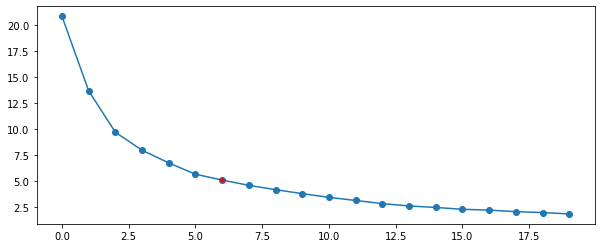

In [30]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

# scaling the data using MinMaxScaler/StandardScaler
Toronto_grouped_clustering =Toronto_df.copy()
Toronto_grouped_clustering = Toronto_grouped_clustering.drop(['Neighbourhood Id','Neighbourhood'
                                                             ,'Latitude','Longitude'], axis=1)
Toronto_grouped_clustering = preprocessing.MinMaxScaler().fit_transform(Toronto_grouped_clustering)

# 
KClusters = 20
ClusterScore = []
for k in range(KClusters):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k+1, random_state=0).fit(Toronto_grouped_clustering)
    ClusterScore.append(kmeans.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(KClusters), ClusterScore, 'o-')

plt.plot(6, ClusterScore[6], 'r*')
print('Using the elbow method the value of 7 was chosen for the number of clusters')

kmeans = KMeans(n_clusters=7, random_state=0).fit(Toronto_grouped_clustering)

In [31]:
Toronto_Clusters= Toronto_df.copy()
Toronto_Clusters['Cluster'] = kmeans.labels_

Toronto_Clusters.head()


,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
0,1,West Humber-Clairville,57,46,43.678524,-79.629129,0.0,0.0,0.0,0
1,2,Mount Olive-Silverstone-Jamestown,61,17,43.742049,-79.591955,0.0,0.0,0.0,4
2,3,Thistletown-Beaumond Heights,54,10,43.737266,-79.565317,3.0,0.0,0.0,4
3,4,Rexdale-Kipling,58,8,43.679477,-79.550504,0.0,0.0,0.0,4
4,5,Elms-Old Rexdale,48,5,43.709180,-79.543698,0.0,0.0,0.0,4


## Results
clusters 1, 2, and 6 are the best neighbourhoods

In [32]:
Toronto_Clusters.groupby(['Cluster'])[['Walk Score','Hazard Index', 'Healthcare Score',
                                       'Fitness Score','Healthy Food Score']].mean()

,Walk Score,Hazard Index,Healthcare Score,Fitness Score,Healthy Food Score
Cluster,,,,,
0,65.260870,28.608696,2.434783,0.434783,0.304348
1,88.800000,24.000000,9.400000,2.000000,5.400000
2,90.500000,10.000000,27.000000,14.000000,2.000000
3,87.357143,14.821429,2.964286,2.607143,0.678571
4,57.125000,9.343750,0.781250,0.281250,0.031250
5,73.416667,12.479167,1.208333,0.625000,0.083333
6,97.000000,43.000000,8.000000,12.000000,3.500000


In [33]:
Cluster0 = Toronto_Clusters[Toronto_Clusters['Cluster']==0]
# Reletively bad walk score, and average Hazard index (the one with good walk score has a bad Hazard index),
# low healthcare, fitness and healthfood score
Cluster0

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
0,1,West Humber-Clairville,57,46,43.678524,-79.629129,0.0,0.0,0.0,0
13,14,Islington-City Centre West,72,26,43.649408,-79.454375,3.0,0.0,0.0,0
20,21,Humber Summit,61,25,43.760078,-79.571760,0.0,2.0,0.0,0
25,26,Downsview-Roding-CFB,59,21,43.738203,-79.476776,0.0,0.0,0.0,0
26,27,York University Heights,60,27,43.758781,-79.519434,1.0,1.0,0.0,0
35,36,Newtonbrook West,69,24,43.795986,-79.413090,0.0,0.0,1.0,0
47,48,Hillcrest Village,68,19,43.681695,-79.425712,5.0,3.0,1.0,0
49,50,Newtonbrook East,64,21,43.795986,-79.413090,0.0,0.0,1.0,0
76,77,Waterfront Communities-The Island,92,65,43.713233,-79.441931,2.0,1.0,0.0,0
110,111,Rockcliffe-Smythe,61,21,43.674983,-79.493424,1.0,0.0,0.0,0


In [34]:
Cluster1 = Toronto_Clusters[Toronto_Clusters['Cluster']==1]
# good walk score with average Hazard index (the one with bad walk score has a good Hazard index), 
# average healthcare, fitness and 
# high healthfood score
Cluster1

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
33,34,Bathurst Manor,61,11,43.665519,-79.411937,9.0,5.0,5.0,1
74,75,Church-Yonge Corridor,98,35,43.657205,-79.403972,11.0,1.0,6.0,1
77,78,Kensington-Chinatown,97,32,43.654069,-79.400146,13.0,1.0,6.0,1
80,81,Trinity-Bellwoods,94,17,43.656720,-79.403145,11.0,1.0,6.0,1
94,95,Annex,94,25,43.670338,-79.407117,3.0,2.0,4.0,1


In [35]:
Cluster2 = Toronto_Clusters[Toronto_Clusters['Cluster']==2]
# good walk score and Hazard index, 
# great healthcare and fitness 
# average healthfood score
Cluster2

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
78,79,University,97,15,43.656119,-79.384670,41.0,15.0,2.0,2
96,97,Yonge-St.Clair,84,5,43.671062,-79.387253,13.0,13.0,2.0,2


In [36]:
Cluster3 = Toronto_Clusters[Toronto_Clusters['Cluster']==3]
# good walk score and Hazard index varies, 
# complecated
Cluster3

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
36,37,Willowdale West,78,7,43.761510,-79.410923,7.0,5.0,0.0,3
50,51,Willowdale East,84,33,43.761510,-79.410923,7.0,5.0,0.0,3
61,62,East End-Danforth,85,20,43.677437,-79.315513,1.0,1.0,1.0,3
62,63,The Beaches,88,13,43.671024,-79.296712,2.0,2.0,2.0,3
64,65,Greenwood-Coxwell,88,7,43.683340,-79.326639,3.0,3.0,1.0,3
65,66,Danforth,86,9,43.686433,-79.300355,6.0,2.0,0.0,3
66,67,Playter Estates-Danforth,90,6,43.682550,-79.327937,2.0,3.0,1.0,3
67,68,North Riverdale,90,15,43.665470,-79.352594,0.0,0.0,1.0,3
68,69,Blake-Jones,89,8,43.728125,-79.383857,0.0,1.0,0.0,3
69,70,South Riverdale,91,32,43.665470,-79.352594,0.0,0.0,1.0,3


In [37]:
Cluster4 = Toronto_Clusters[Toronto_Clusters['Cluster']==4]
# bad walk score,but very low hazard index
# low healthcare, fitness and healthfood score
Cluster4

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
1,2,Mount Olive-Silverstone-Jamestown,61,17,43.742049,-79.591955,0.0,0.0,0.0,4
2,3,Thistletown-Beaumond Heights,54,10,43.737266,-79.565317,3.0,0.0,0.0,4
3,4,Rexdale-Kipling,58,8,43.679477,-79.550504,0.0,0.0,0.0,4
4,5,Elms-Old Rexdale,48,5,43.709180,-79.543698,0.0,0.0,0.0,4
5,6,Kingsview Village-The Westway,56,10,43.692642,-79.555313,2.0,1.0,0.0,4
6,7,Willowridge-Martingrove-Richview,51,9,43.679368,-79.557741,0.0,0.0,0.0,4
7,8,Humber Heights-Westmount,58,11,43.695909,-79.522160,1.0,0.0,0.0,4
8,9,Edenbridge-Humber Valley,49,8,43.674405,-79.517559,0.0,0.0,0.0,4
9,10,Princess-Rosethorn,48,3,43.649470,-79.465161,1.0,2.0,0.0,4
10,11,Eringate-Centennial-West Deane,57,9,43.704321,-79.431951,0.0,1.0,1.0,4


In [38]:
Cluster5 = Toronto_Clusters[Toronto_Clusters['Cluster']==5]
# Average walk score,but very low hazard index
Cluster5

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
11,12,Markland Wood,69,6,43.631239,-79.585434,0.0,0.0,0.0,5
12,13,Etobicoke West Mall,74,12,43.643549,-79.565325,5.0,2.0,0.0,5
14,15,Kingsway South,68,6,43.647381,-79.511333,4.0,0.0,1.0,5
15,16,Stonegate-Queensway,67,16,43.630609,-79.499878,0.0,0.0,0.0,5
16,17,Mimico,71,14,43.616677,-79.496805,2.0,0.0,0.0,5
17,18,New Toronto,79,12,43.600763,-79.505264,2.0,2.0,0.0,5
18,19,Long Branch,72,4,43.592005,-79.545365,1.0,0.0,0.0,5
19,20,Alderwood,70,5,43.601717,-79.545232,1.0,0.0,0.0,5
30,31,Yorkdale-Glen Park,72,18,43.716822,-79.445651,2.0,2.0,0.0,5
31,32,Englemount-Lawrence,70,7,43.718092,-79.418877,0.0,0.0,1.0,5


In [39]:
Cluster6 = Toronto_Clusters[Toronto_Clusters['Cluster']==6]
# good walk score but bad Hazard index, 
# good healthcare 
# great fitness and healthfood score
Cluster6

,Neighbourhood Id,Neighbourhood,Walk Score,Hazard Index,Latitude,Longitude,Healthcare Score,Fitness Score,Healthy Food Score,Cluster
72,73,Moss Park,95,39,43.654644,-79.369728,5.0,12.0,5.0,6
75,76,Bay Street Corridor,99,47,43.672135,-79.390499,11.0,12.0,2.0,6


Generate a map to visualize the clustered neighborhoods


In [70]:
#!pip install folium
import folium

Clusters = [Cluster0, Cluster1, Cluster2, Cluster3, Cluster4, Cluster5, Cluster6]
Colors = ['red', 'lightgreen', 'blue', 'lightblue', 'orange','yellow', 'green']
Description = ['bad walk score, avg Hazard index',
              'great healthfood ',
              'great healthcare & fitness',
              'good walk score',
              'bad walk score, good hazard index',
              'Average walk score, good hazard index',
              'great fitness & healthfood']


map_clusters = folium.Map(location=[Toronto_Clusters['Latitude'].mean(), Toronto_Clusters['Longitude'].mean()+0.01], zoom_start=11)

lgd_txt = '<span style="color: {col};">{txt}</span>'
for CLUSTER in Clusters:
    #group[Clusternum] = folium.FeatureGroup(name='<span style=\\"color: red;\\">red circles</span>')
    Clusternum = int(CLUSTER['Cluster'].mean())
    group= folium.FeatureGroup(name='<span style="color: {col};">{txt}</span>'.format(col=Colors[Clusternum],
                                                                                      txt= 'Cluster{}:{}'.format(Clusternum, Description[Clusternum])))
    
    for hoodID, lat, lng in zip(CLUSTER['Neighbourhood Id'], CLUSTER['Latitude'], CLUSTER['Longitude']):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup='{}, \n {}'.format(hoodID, Description[Clusternum]),
            color='black',
            fill=True,
            fill_color=Colors[Clusternum],
            fill_opacity=0.9).add_to(group)
    group.add_to(map_clusters)

folium.map.LayerControl('bottomright', collapsed=False).add_to(map_clusters)

map_clusters

